# TP2 - Segmentation des images
Ce notebook contient toutes les étapes du TP2 sur la segmentation d'images en niveaux de gris.

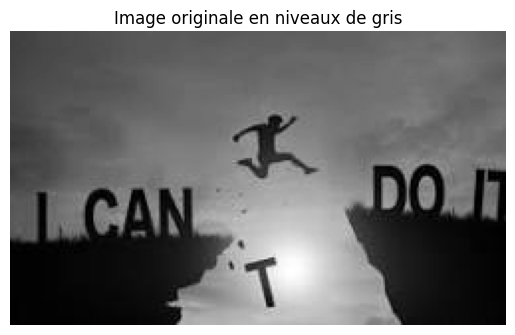

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image en niveaux de gris
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Afficher l'image originale
plt.imshow(image, cmap='gray')
plt.title("Image originale en niveaux de gris")
plt.axis('off')
plt.show()


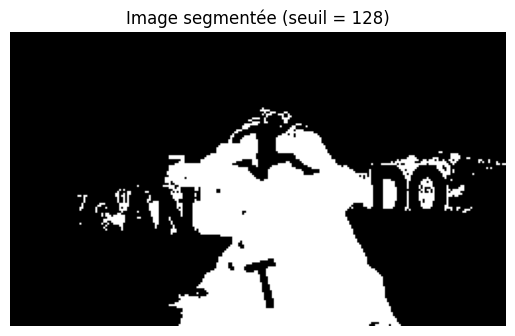

In [4]:

# Appliquer un seuillage manuel (seuil = 128)
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Afficher l'image segmentée
plt.imshow(binary_image, cmap='gray')
plt.title("Image segmentée (seuil = 128)")
plt.axis('off')
plt.show()


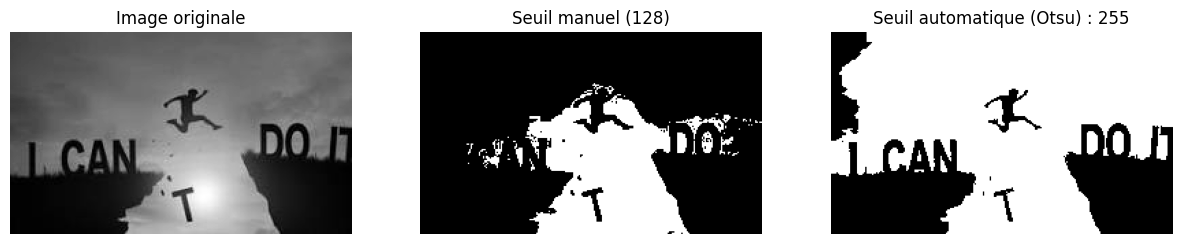

In [5]:

# Appliquer la méthode d'Otsu
_, otsu_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Affichage comparatif
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(image, cmap='gray')
axs[0].set_title("Image originale")
axs[0].axis('off')

axs[1].imshow(binary_image, cmap='gray')
axs[1].set_title("Seuil manuel (128)")
axs[1].axis('off')

axs[2].imshow(otsu_image, cmap='gray')
axs[2].set_title(f"Seuil automatique (Otsu) : {otsu_image.max()}")
axs[2].axis('off')

plt.show()


In [ ]:
from ipywidgets import interact

def apply_threshold(threshold):
    _, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    plt.imshow(binary_image, cmap='gray')
    plt.title(f"Image segmentée (seuil = {threshold})")
    plt.axis('off')
    plt.show()

interact(apply_threshold, threshold=(0, 255, 1))


In [ ]:

# Sauvegarde des images avec plusieurs seuils
for t in [50, 100, 150, 200]:
    _, img = cv2.threshold(image, t, 255, cv2.THRESH_BINARY)
    cv2.imwrite(f'segmented_{t}.jpg', img)


In [ ]:

# Appliquer un flou Gaussien avant Otsu
blurred = cv2.GaussianBlur(image, (5, 5), 0)
_, otsu_blur = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Affichage de l'effet du flou
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(otsu_image, cmap='gray')
axs[0].set_title("Otsu sans flou")
axs[0].axis('off')

axs[1].imshow(otsu_blur, cmap='gray')
axs[1].set_title("Otsu avec flou")
axs[1].axis('off')

plt.show()
